# Lecture 3 - Quantitative Trading Strategies

**Content**:
- Types of data
- Data sources
- Data storage (Pandas)
- Time series analysis
- Strategies + Signals

### Types of data
- Time-series data: data points collected at constant time intervals e.g. stock prices
- Cross-sectional data: data points collected at a single point in time e.g. company balance sheet metrics
- Panel data: combination of time-series and cross-sectional data e.g. company balance sheet metrics over time

### Data sources
- APIs: Application Programming Interfaces
- APIs allow you to access data from a service provider. We used APIs to access financial data without having to download it manually.

### Data storage
- Python has an amazing open source data analysis library called pandas.
- Think of pandas as an extremely powerful version of Excel.
- We can store data in a pandas DataFrame, which is a 2-dimensional labeled data structure with columns of potentially different types.

In [26]:
import pandas as pd

In [38]:
## creating a data frame
## motivation: let's create a table that accounts for the ages of QS department members
my_df1 = pd.DataFrame(columns=['Age'], index=['Jonathan', 'Arnav', 'Ella', 'Sophia'], data=[20, 20, 20, 21])

## let's take the sum of all the ages, and divide it by the number: 
sum_of_ages = sum(my_df1.values)
total_number_of_people = my_df1.shape[0]
average_age = sum_of_ages / total_number_of_people
print(average_age)

## we can simplify the above process, by calling a mean function
average_age = my_df1.mean()
print(average_age)


[20.25]
Age    20.25
dtype: float64


In [51]:
my_df2 = pd.read_csv('/Users/jonathanchoi/Desktop/GitHub Projects/VIG-QS/analyst-program/world population growth rate by cities 2024.csv')
display(my_df2.head(8))

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Yancheng Jiangsu,China,Asia,2034326,1993463,0.0205
1,Dhanbad,India,Asia,1414532,1389776,0.0178
2,Peshawar,Pakistan,Asia,2480546,2411785,0.0285
3,Santiago,Chile,South America,6950952,6903392,0.0069
4,Sorocaba,Brazil,South America,821435,813320,0.0100
5,Abidjan,Ivory Coast,Africa,5866704,5686350,0.0317
6,Puning,China,Asia,1282756,1254160,0.0228
7,Sofia,Bulgaria,Europe,1287540,1288114,-0.0004


In [66]:
## first task: I want to know the largest city population in 2023
# my_df2['Population (2023)'].max()

my_df2.loc[my_df2['Population (2023)'].idxmax()]
my_df2.loc[my_df2['Population (2023)'].idxmax()]['City']

'Tokyo'

In [77]:
## second task: I want to know the number of cities with a population above 10 e+06
my_list = list(my_df2['Population (2023)'] >= 10e6)
my_df2.loc[my_df2['Population (2023)'] >= 10e6].shape[0]

32

In [84]:
## third task: which continent, has the most cities in this dataframe?
import numpy as np
continents = my_df2['Continent'].unique()

for continent in continents:
    print(continent)
    print(my_df2.loc[my_df2['Continent'] == continent].shape[0])
    
    
Update    
# I've finished my lectures (1 and 3) for the QS section of the analyst program. Feel free to check out the colab notebooks that I've posted above. 
# The time-series regression model is finished, I'm just waiting on Arnav to finish his cross-sectional model so we can compare and integrate the two of them.
# I'm interviewing a QS applicant tomorrow morning, so I'll let you know how that goes.

Asia
500
South America
62
Africa
106
Europe
53
North America
63
Oceania
4
nan
0
Oceana
2


### Time Series Analysis
- Time series data is a sequence of data points collected at constant time intervals.
- Time series analysis is used to extract meaningful statistics and other characteristics of the data.
- We can plot the data to visualize trends, seasonality, and other patterns.
- Let's first consider the concept of a moving average.
- In finance, we have tail-events, which means that things that have never happened before, happen all the time.

#### Moving Average
- Stock prices are inherently volatile, and fluctuate frequently, we call this noise.
- However, we can smooth out the noise by calculating a simple moving average which is the average of the last n data points. 
  $$ SMA_t = \frac{\sum_{i=t-n}^{t} P_i}{n}$$
- This formula is saying, that the SMA at time t, is the average of the last n data points.
- Now, let's try to implement this in Python.

In [5]:
import numpy as np

Let's look at an example of a SMA.

Given an array with length $6$ and window size $3$, how would we calculate the SMA at each point?

[0,1,2,3,4,5]
- 0,1,2 -> 1
- 1,2,3 -> 2 
- 2,3,4 -> 3
- 3,4,5 -> 4
- 4,5 -> 5 (edge case)
- 5 -> 5 (edge case)

In the above example, we see that the window eventually reaches the end of the array, and we have to deal with the edge case.
- After which index, does the window reach the end of the array?
- The 4th index is where we run into the edge cases.

In the general case, if we have an array with length $n$ and a window size of $w$, the edge cases begin at index $n-w+1$.

Let's establish the kind of data we're going to be working with

In [11]:
import yfinance as yf

In [12]:
my_nvda = yf.Ticker('NVDA')

In [53]:
historical_data = my_nvda.history(start='2024-01-01', end='2024-02-01', interval='1d')['Close']
# display(historical_data)
# display(historical_data.values)
# display(historical_data.index)
# print(historical_data.shape)

In [54]:
import matplotlib.pyplot as plt
def my_moving_average(my_arr, n):
    """
    This function takes in a np.array and computes the simple moving average based on n
    """
    length = my_arr.shape[0]
    my_sma_arr = np.empty(length)
    my_sma_arr[:] = np.nan
    
    for i in range(length):
        if i > length - n + 1:
            my_sma_arr[i] = np.average(my_arr[i:])
        else:
            my_sma_arr[i] = np.average(my_arr[i:i+n])
    
    plt.plot(my_arr.index, my_sma_arr, label=f'SMA-{n}')
    plt.xticks(rotation=30)
    plt.plot(my_arr.index, my_arr.values, label='Data')

    plt.legend()

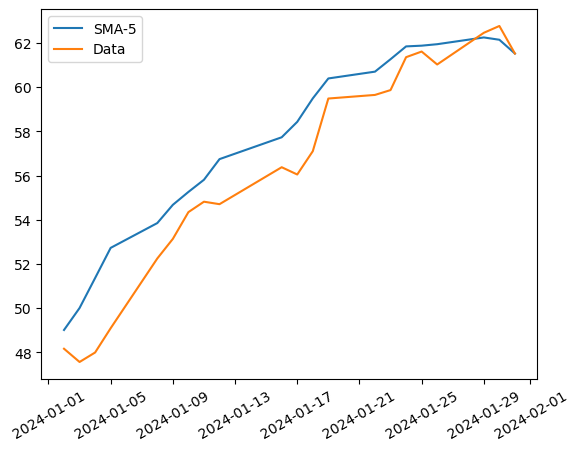

In [55]:
my_moving_average(historical_data, 5)

### Strategies + Signals
- Now that we have a basic understanding of moving averages and time series data, we can start to think of strategies.
- A strategy is a set of rules that determine when to buy or sell an asset.
- Quantitative Trading Strategies are based on mathematical models that can be used to generate buy and sell signals.


### Crossover Strategy
- The crossover strategy is a simple trading strategy that uses two moving averages.
- We have one short-term moving average SMA1 and one long-term moving average SMA2.
- If SMA1 crosses above SMA2, we generate a buy signal. It indicates that the stock price is trending upwards (there is bullish momentum).
- If SMA2 crosses above SMA1, we generate a sell signal. It indicates that the stock price is trending downwards (there is bearish momentum).

In [64]:
import yfinance as yf
import pandas as pd

In [91]:
my_time_series_data = yf.Ticker('NVDA').history(start='2023-01-01', end='2024-08-20')['Close']
my_time_series_data = pd.DataFrame(my_time_series_data)

In [86]:
display(my_time_series_data.head(10))

,Close
Date,
2023-01-03 00:00:00-05:00,14.306805
2023-01-04 00:00:00-05:00,14.740557
2023-01-05 00:00:00-05:00,14.256834
2023-01-06 00:00:00-05:00,14.850493
2023-01-09 00:00:00-05:00,15.619055
2023-01-10 00:00:00-05:00,15.899893
2023-01-11 00:00:00-05:00,15.991838
2023-01-12 00:00:00-05:00,16.501545
2023-01-13 00:00:00-05:00,16.889324


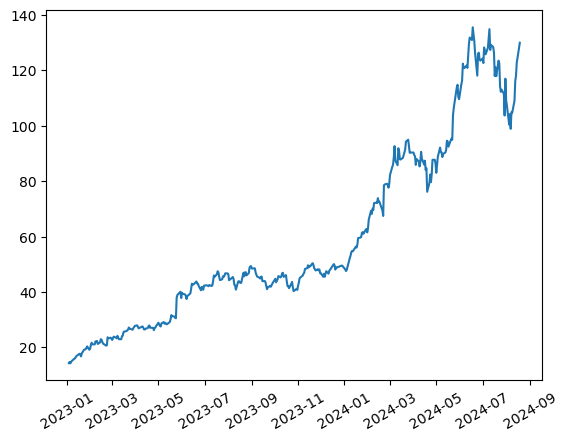

In [92]:
plot = plt.plot(my_time_series_data.index, my_time_series_data.values)
_ = plt.xticks(rotation=30)

In [93]:
display(my_time_series_data)

,Close
Date,
2023-01-03 00:00:00-05:00,14.306805
2023-01-04 00:00:00-05:00,14.740557
2023-01-05 00:00:00-05:00,14.256834
2023-01-06 00:00:00-05:00,14.850493
2023-01-09 00:00:00-05:00,15.619055
...,...
2024-08-13 00:00:00-04:00,116.139999
2024-08-14 00:00:00-04:00,118.080002
2024-08-15 00:00:00-04:00,122.860001


,Close,SMA_small,SMA_large,Small > Large
Date,,,,
2023-01-03 00:00:00-05:00,14.306805,NaN,NaN,False
2023-01-04 00:00:00-05:00,14.740557,NaN,NaN,False
2023-01-05 00:00:00-05:00,14.256834,NaN,NaN,False
2023-01-06 00:00:00-05:00,14.850493,NaN,NaN,False
2023-01-09 00:00:00-05:00,15.619055,NaN,NaN,False
...,...,...,...,...
2024-08-13 00:00:00-04:00,116.139999,107.198999,120.083681,False
2024-08-14 00:00:00-04:00,118.080002,107.305000,120.145470,False
2024-08-15 00:00:00-04:00,122.860001,108.670000,120.274122,False


Buy signal @ 2023-03-15 00:00:00-04:00
Sell signal @ 2023-08-18 00:00:00-04:00
Buy signal @ 2023-08-23 00:00:00-04:00
Sell signal @ 2023-09-19 00:00:00-04:00
Buy signal @ 2023-10-12 00:00:00-04:00
Sell signal @ 2023-10-20 00:00:00-04:00
Buy signal @ 2023-11-10 00:00:00-05:00
Sell signal @ 2024-04-24 00:00:00-04:00
Buy signal @ 2024-05-08 00:00:00-04:00
Sell signal @ 2024-07-29 00:00:00-04:00


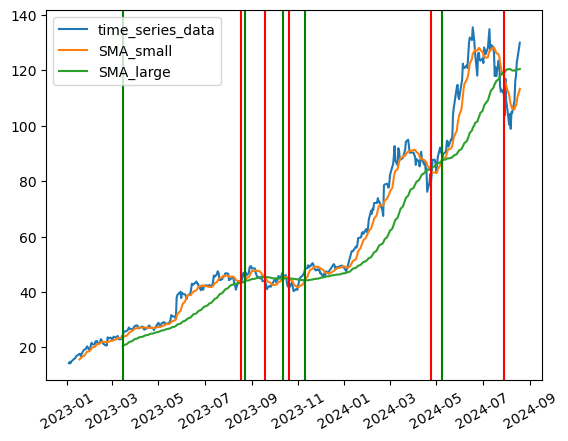

In [99]:
def my_cross_over_strategy(time_series_closes, window_small, window_large):
     """
     We want to output a signal buy or sell, depending on when we have a cross over between the large and small moving averages
     e.g. 10, 14, (small)
          11, 12 (large) -> output a buy signal, since the small oving average cross over the large
     """
     time_series_closes['SMA_small'] = time_series_closes['Close'].rolling(window=window_small).mean()
     time_series_closes['SMA_large'] = time_series_closes['Close'].rolling(window=window_large).mean()
     
     ## let's compare small with large:
     time_series_closes['Small > Large'] = time_series_closes['SMA_small'] > time_series_closes['SMA_large']
     display(time_series_closes)
     
     # when False -> True
     # Positive cross over, so now small is greater than large, buy signal
     
     signals = {
          'buy': [],
          'sell': []
     }
     
     boolean_column = time_series_closes['Small > Large']
     previous = boolean_column.values[0]
     for index in boolean_column.index:
          current = boolean_column[index]
          if previous == current:
               # don't send signal nothing has crossed over
               previous = current
               continue
          else:
               # we send a signal, because something has crossed over
               # but we need to figure out if it's a positive or negative cross over
               if current == True:
                    previous = current
                    # if current was true, then the previous must have been false
                    print(f'Buy signal @ {index}')
                    signals['buy'].append(index)
               else:
                    previous = current 
                    # if current was false, then the previous must have been true 
                    print(f'Sell signal @ {index}')     
                    signals['sell'].append(index)
     plt.plot(time_series_closes.index, time_series_closes['Close'].values, label='time_series_data')
     plt.plot(time_series_closes.index, time_series_closes['SMA_small'].values, label='SMA_small')
     plt.plot(time_series_closes.index, time_series_closes['SMA_large'].values, label='SMA_large')
     plt.xticks(rotation=30)
     plt.legend()
     
     
     ## I want to show on the graph, the buy and sell signals
     
     for key in signals.keys():
          for date in signals[key]:
               plt.axvline(date, color = ('g' if key == 'buy' else 'r'))
          
          
my_cross_over_strategy(my_time_series_data, 10, 50)